In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split


## Data Preprocessing

In [8]:
df = pd.read_csv('Iris.csv')

df2 = df.drop(['Id', 'SepalLengthCm', 'PetalLengthCm'], axis=1)
df2['Species'].replace(to_replace=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], value=[1., -1., -1.], inplace=True)
df2.head()

,SepalWidthCm,PetalWidthCm,Species
0,3.5,0.2,1.0
1,3.0,0.2,1.0
2,3.2,0.2,1.0
3,3.1,0.2,1.0
4,3.6,0.2,1.0


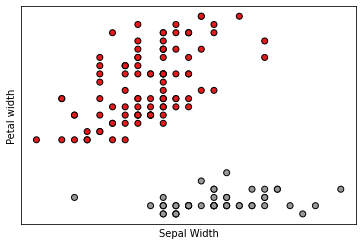

In [12]:
x = df2[['SepalWidthCm', 'PetalWidthCm']].values
y = df2['Species'].values
# Plot the training points
#plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1],c=y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal Width')
plt.ylabel('Petal width')
plt.xticks(())
plt.yticks(())
plt.show()

In [20]:
(x_train,x_test,y_train,y_test)=train_test_split(x, y, test_size=0.7)
x_train = x_train.transpose()
Xt = np.array([np.ones(len(x_train[0])),x_train[0]])
X1=Xt.transpose()
X2=x_train[1].transpose()
Z = np.matmul(Xt,X1)
Zinv=np.linalg.inv(Z)
Z2=np.matmul(Zinv,Xt)
Z3=np.matmul(Z2,X2)

#Z3 is the pseudoinverse
b = Z3[0]
m = Z3[1]
ypred=m*x_train[0]+b

print("Problem 3a: ""y=",m,"x+",b)

Problem 3a: y= -1.0072110569540011 x+ 4.141857514856138


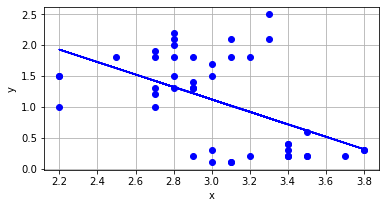

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_train[0], x_train[1], 'bo')
ax.plot(x_train[0], ypred, 'b')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
